In [1]:
from tropical_rainfall import Tropical_Rainfall
from aqua.util import add_pdf_metadata

In [3]:
machine = 'levante'

In [13]:
if machine == 'levante':
    path_to_output = "/work/bb1153/b382267/output/"
    path_to_observations = "/work/bb1153/b382267/observations/"
else:
    path_to_output = "/pfs/lustrep3/projappl/project_465000454/nazarova/output/"
    path_to_observations = "/pfs/lustrep3/projappl/project_465000454/nazarova/observations/"

path_to_pdf = path_to_output+'pdf/deliverable2/'
    

In [7]:
diag = Tropical_Rainfall()

pdf_format=False

## Daily variability

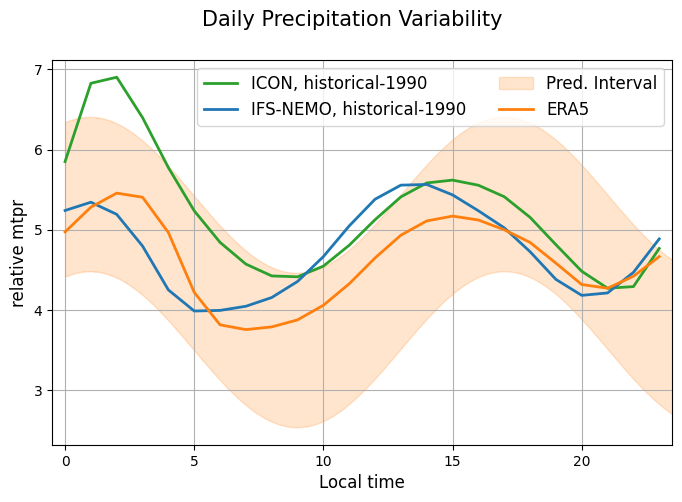

In [16]:

name_of_file = 'historical_1990_tmp'
legend = "ICON, historical-1990"
filename_icon = path_to_output+'netcdf/ICON_historical-1990/r100/H/trop_rainfall_r100_H_daily_variability_1990-01-01T00_1994-07-31T23_1H.nc'
add, _path_to_pdf = diag.daily_variability_plot(path_to_netcdf=filename_icon, legend=legend,
                                        trop_lat=90, relative=False, color='tab:green',
                                        linestyle='--',
                                        path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                                        name_of_file=name_of_file)

legend = "IFS-NEMO, historical-1990"
filename_ifs = path_to_output+"netcdf/IFS-NEMO_historical-1990/r100/H/trop_rainfall_r100_H_daily_variability_1990-01-01T00_1997-01-31T23_1H.nc"
add, _path_to_pdf = diag.daily_variability_plot(path_to_netcdf=filename_ifs, legend=legend, add=add,
                                        trop_lat=90, relative=False, color='tab:blue',
                                        linestyle='--',
                                        path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                                        name_of_file=name_of_file)

filename_era5 = path_to_observations+'ERA5/r100/H/trop_rainfall_r100_H_daily_variability_1990-01-01T00_2011-03-31T23_1H.nc'
diag.daily_variability_plot(path_to_netcdf=filename_era5, legend='ERA5', relative=False,
                                        color='tab:orange', add=add,
                                        percentile=True,
                                        linestyle='--', path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                                        name_of_file=name_of_file)

#filename_imerg = path_to_observations+'IMERG/r100/H/trop_rainfall_r100_H_daily_variability_2020-01-01T00_2021-05-31T23_1H.nc'
#diag.daily_variability_plot(path_to_netcdf=filename_imerg, legend='IMERG', relative=False,
#                                        color='tab:red', add=add,
#                                        linestyle='--', path_to_pdf=path_to_pdf, pdf_format=pdf_format,
#                                        name_of_file=name_of_file)

description = (
    f"Comparison of the daily variability of the precipitation data, measured in mm/day. "
    f"The spatial resolution is 10.0 degrees, and the temporal resolution is 1 hour. "
    f"The comparison involves the following datasets and their respective time ranges: "
    f"ICON (historical-1990) covers {diag.tools.open_dataset(filename_icon).time_band}, "
    f"IFS-NEMO (historical-1990) spans {diag.tools.open_dataset(filename_ifs).time_band}, and "
    f"ERA5's time range is {diag.tools.open_dataset(filename_era5).time_band}."
)
if pdf_format:
    add_pdf_metadata(filename=_path_to_pdf, metadata_value=description, loglevel = 'warning')

Histograms, r025, H

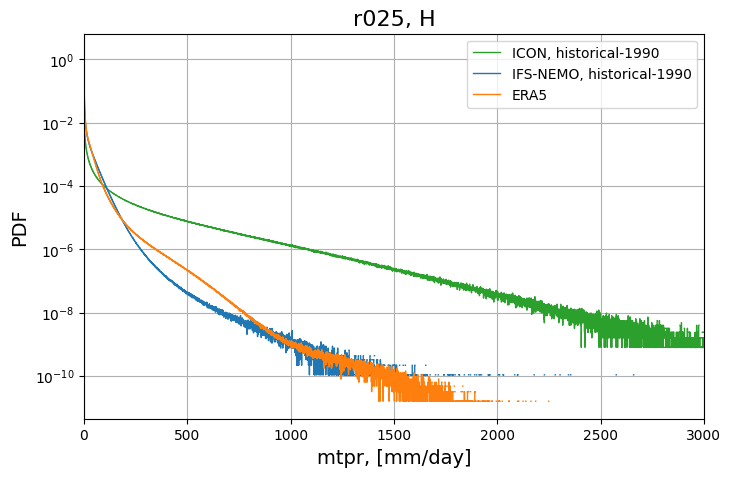

In [18]:
era5_merged =  diag.tools.open_dataset(path_to_observations+'ERA5/r025/H/trop_rainfall_r025_H_histogram_0-0_5000-0_10000_1940-01-01T07_2022-12-31T23_1H.nc')
icon_merged = diag.tools.open_dataset(path_to_output+'netcdf/ICON_historical-1990/r025/H/trop_rainfall_r025_H_histogram_0-0_5000-0_10000_1990-01-01T00_1991-08-31T23_1H.nc')
ifs_merged = diag.tools.open_dataset(path_to_output+'netcdf/IFS-NEMO_historical-1990/r025/H/trop_rainfall_r025_H_histogram_0-0_5000-0_10000_1990-01-01T00_2002-02-28T23_1H.nc')

plot_title = 'r025, H'
add, _path = diag.histogram_plot(icon_merged,
                            pdf=True, legend="ICON, historical-1990", color='tab:green',
                            name_of_file='r025_H', path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                            plot_title="r025, H") #, factor=self.factor)
add, _path = diag.histogram_plot(ifs_merged, add=add,
                            pdf=True, legend="IFS-NEMO, historical-1990", color='tab:blue', 
                            name_of_file='r025_H', path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                            plot_title="r025, H") #, factor=self.factor)
diag.histogram_plot(era5_merged, add=add, pdf=True, linewidth=1, color='tab:orange', legend="ERA5",
                    path_to_pdf=path_to_pdf, pdf_format=pdf_format, plot_title=plot_title, xmax=3000,
                    name_of_file='r025_H')

description = (
    f"Comparison of the probability distribution function (PDF) for precipitation data across different datasets, measured in mm/day. "
    f"The spatial resolution is 0.25 degrees, and the temporal resolution is 1 hour. "
    f"The comparison involves the following datasets and their respective time ranges: "
    f"ICON (historical-1990) covers {icon_merged.time_band}, "
    f"IFS-NEMO (historical-1990) spans {ifs_merged.time_band}, and "
    f"ERA5's time range is {era5_merged.time_band}."
)
if pdf_format:
    add_pdf_metadata(filename=_path, metadata_value=description, loglevel = 'warning')

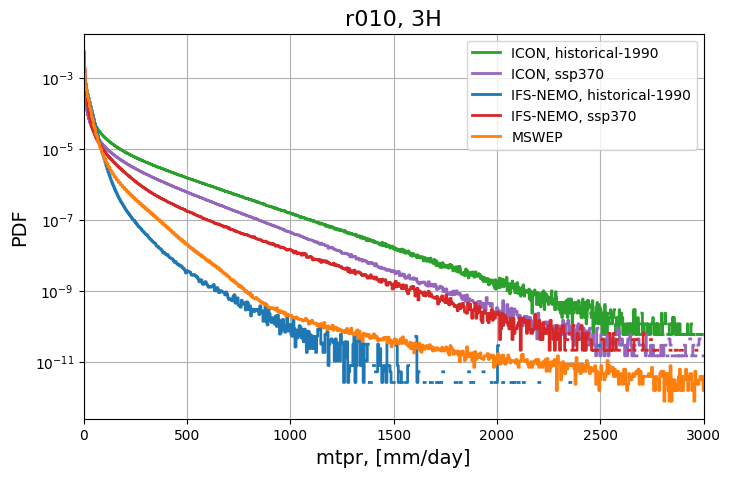

In [19]:
plot_title = 'r010, 3H'
name_of_file = 'r010_3H_rebining'

factor=10

pdf_format = True

mswep_merged =  diag.tools.open_dataset(path_to_observations+'MSWEP/r010/3H/trop_rainfall_r010_3H_histogram_0-0_5000-0_10000_1980-01-01T00_2020-12-31T00_3H.nc')
icon_merged = diag.tools.open_dataset(path_to_output+'netcdf/ICON_historical-1990/r010/3H/trop_rainfall_r010_3H_histogram_0-0_5000-0_10000_1990-01-01T00_1992-02-29T21_3H.nc')
ifs_merged = diag.tools.open_dataset(path_to_output+'netcdf/IFS-NEMO_historical-1990/r010/3H/trop_rainfall_r010_3H_histogram_0-0_5000-0_10000_1990-01-01T00_2002-02-28T21_3H.nc')
icon_ssp370 = diag.tools.open_dataset(path_to_output+'netcdf/ICON_ssp370/r010/3H/trop_rainfall_r010_3H_histogram_0-0_5000-0_10000_2020-01-01T00_2022-02-28T21_3H.nc')
ifs_ssp370 = diag.tools.open_dataset(path_to_output+'netcdf/IFS-NEMO_ssp370/r010/3H/trop_rainfall_r010_3H_histogram_0-0_5000-0_10000_2028-07-01T00_2029-12-31T21_3H.nc')

add, _path = diag.histogram_plot(icon_merged,
                            pdf=True, legend="ICON, historical-1990", color='tab:green', 
                            name_of_file=name_of_file, path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                            factor=5,
                            plot_title="r010, M", linewidth=2) #, factor=self.factor)
add, _path = diag.histogram_plot(icon_ssp370, add=add,
                            pdf=True, legend="ICON, ssp370", color='tab:purple', 
                            name_of_file=name_of_file, path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                            factor=factor,
                            plot_title="r010, M", linewidth=2) #, factor=self.factor)
add, _path = diag.histogram_plot(ifs_merged, add=add,
                            pdf=True, legend="IFS-NEMO, historical-1990", color='tab:blue', linewidth=2,
                            factor=factor,
                            name_of_file=name_of_file, path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                            plot_title="r010, M") #, factor=self.factor)
add, _path = diag.histogram_plot(ifs_ssp370, add=add,
                            pdf=True, legend="IFS-NEMO, ssp370", color='tab:red', linewidth=2,
                            factor=factor,
                            name_of_file=name_of_file, path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                            plot_title="r010, M") #, factor=self.factor)

diag.histogram_plot(mswep_merged, add=add, pdf=True,  color='tab:orange', legend="MSWEP",  linewidth=2,
                    plot_title=plot_title, xmax=3000, 
                    factor=factor,
                    path_to_pdf=path_to_pdf, pdf_format=pdf_format, name_of_file=name_of_file)
                                    #factor=self.era5_factor)
description = (f"This analysis compares the probability distribution function (PDF) for precipitation "
               f"data across several datasets, measured in millimeters per day (mm/day). "
               f"It employs a spatial resolution of 0.1 degrees and a temporal resolution of 3 hours. "
               f"The datasets included in the comparison and their respective time ranges are as follows: "
               f"ICON (historical-1990) with a time range of {icon_merged.time_band}, "
               f"ICON (ssp370) covering {icon_ssp370.time_band}, "
               f"IFS-NEMO (historical-1990), spanning {ifs_merged.time_band}, "
               f"IFS-NEMO (ssp370), spanning {ifs_ssp370.time_band}, and "
               f"MSWEP, which extends over {mswep_merged.time_band}.")

if pdf_format:
    add_pdf_metadata(filename=_path, metadata_value=description, loglevel = 'warning')

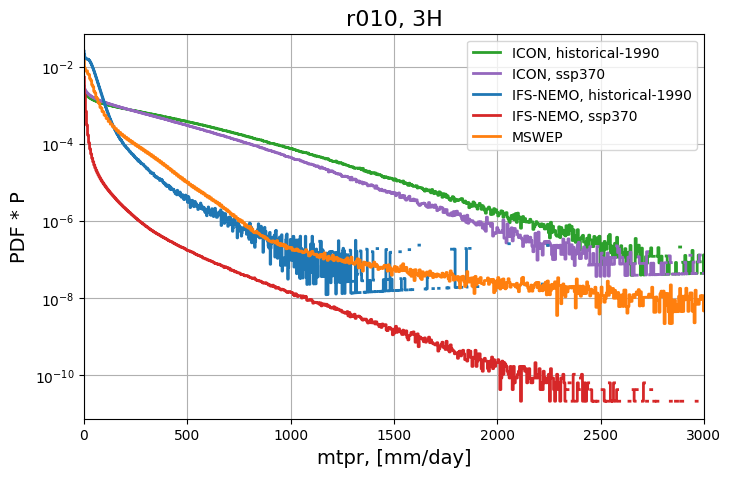

In [23]:
plot_title = 'r010, 3H'
add, _path = diag.histogram_plot(icon_merged,
                            pdfP=True, legend="ICON, historical-1990", color='tab:green',
                            name_of_file=name_of_file, path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                            factor=factor,
                            plot_title="r010, 3H", linewidth=2) #, factor=self.factor)
add, _path = diag.histogram_plot(icon_ssp370, add=add,
                            pdfP=True, legend="ICON, ssp370", color='tab:purple', 
                            factor=factor,
                            name_of_file=name_of_file, path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                            plot_title="r010, M", linewidth=2) #, factor=self.factor)
add, _path = diag.histogram_plot(ifs_merged, add=add,
                            pdfP=True, legend="IFS-NEMO, historical-1990", color='tab:blue', linewidth=2,
                            factor=5,
                            name_of_file=name_of_file, path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                            plot_title="r010, 3H") #, factor=self.factor)
add, _path = diag.histogram_plot(ifs_ssp370, add=add,
                            pdf=True, legend="IFS-NEMO, ssp370", color='tab:red', linewidth=2,
                            factor=factor,
                            name_of_file=name_of_file, path_to_pdf=path_to_pdf, pdf_format=pdf_format,
                            plot_title="r010, M") #, factor=self.factor)
diag.histogram_plot(mswep_merged, add=add, pdfP=True, color='tab:orange', legend="MSWEP", linewidth=2,
                    plot_title=plot_title, xmax=3000,
                    factor=factor,
                    path_to_pdf=path_to_pdf, pdf_format=pdf_format, name_of_file=name_of_file)
                                    #factor=self.era5_factor)
description = (
    f"Comparison of the probability distribution function (PDF) multiplied by probability "
    f"(PDF*P)  for precipitation data across different datasets, measured in mm/day. "
    f"The spatial resolution is 0.1 degrees, and the temporal resolution is 3 hours. "
    f"The comparison involves the following datasets and their respective time ranges: "
    f"ICON (historical-1990) with a time range of {icon_merged.time_band}, "
    f"ICON (ssp370) covering {icon_ssp370.time_band}, "
    f"IFS-NEMO (historical-1990), spanning {ifs_merged.time_band}, "
    f"IFS-NEMO (ssp370), spanning {ifs_ssp370.time_band}, and "
    f"MSWEP, which extends over {mswep_merged.time_band}."
)
if pdf_format:
    add_pdf_metadata(filename=_path, metadata_value=description, loglevel = 'warning')

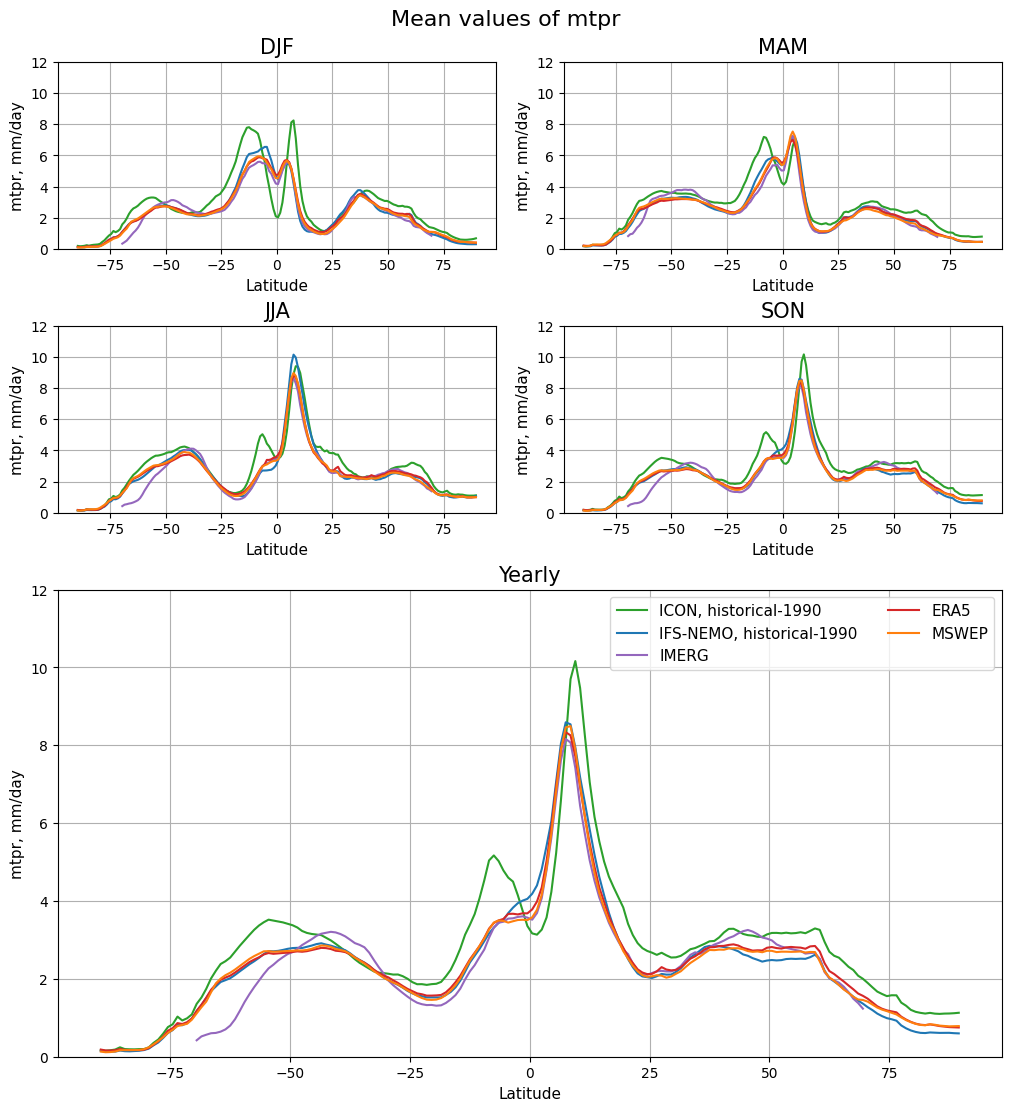

In [21]:
plot_title = 'r010, 3H'

path_icon = path_to_output+"netcdf/ICON_historical-1990/r100/M/mean/"
path_ifs = path_to_output+"netcdf/IFS-NEMO_historical-1990/r100/M/mean/"
mswep = path_to_observations+"MSWEP/r100/M/mean/"
imerg = path_to_observations+"IMERG/r100/M/mean/"
era5 = path_to_observations+"ERA5/r100/M/mean/"
                            
add = diag.plot_of_average(path_to_netcdf=path_icon+"trop_rainfall_r100_M_lon_1990-09-01T00_2004-11-01T00_M.nc", trop_lat=90,
                            color='tab:green', legend="ICON, historical-1990", pdf_format=pdf_format,
                            path_to_pdf=path_to_pdf, name_of_file='profile_lon')
add = diag.plot_of_average(path_to_netcdf=path_ifs+"trop_rainfall_r100_M_lon_1990-09-01T00_2001-11-01T00_M.nc", trop_lat=90,
                            color='tab:blue', fig=add,
                            legend="IFS-NEMO, historical-1990", pdf_format=pdf_format,
                            path_to_pdf=path_to_pdf, name_of_file='profile_lon')
add = diag.plot_of_average(path_to_netcdf=imerg+"trop_rainfall_r100_M_lon_2000-09-01T00_2022-11-01T00_M.nc", trop_lat=90,
                                   color='tab:purple', fig=add, legend="IMERG", pdf_format=pdf_format,
                                   path_to_pdf=path_to_pdf, name_of_file='profile_lon')
add = diag.plot_of_average(path_to_netcdf=era5+"trop_rainfall_r100_M_lon_1940-09-01T00_2023-11-01T06_M.nc", trop_lat=90,
                                   color='tab:red', fig=add, legend="ERA5", pdf_format=pdf_format,
                                   path_to_pdf=path_to_pdf, name_of_file='profile_lon')
path_to_mswep = _mswep+"trop_rainfall_r100_M_lon_1979-09-01T00_2020-11-01T00_M.nc"
diag.plot_of_average(path_to_netcdf=path_to_mswep, 
                            trop_lat=90, color='tab:orange', fig=add,
                            legend="MSWEP", pdf_format=pdf_format,
                            path_to_pdf=path_to_pdf, name_of_file='profile_lon')

description = (
    f"Comparison of the average precipitation profiles along latitude for different datasets, measured in mm/day. "
    f"The spatial resolution is 10.0 degrees, and the temporal resolution is 1 month. "
    f"The comparison involves the following datasets and their respective time ranges: "
    f"ICON (historical-1990) covers {diag.tools.open_dataset(_path_icon+'trop_rainfall_r100_M_lat_1990-01-01T00_2005-01-01T00_M.nc').time_band}, "
    f"IFS-NEMO (historical-1990) spans {diag.tools.open_dataset(_path_ifs+'trop_rainfall_r100_M_lat_1990-01-01T00_2002-02-01T00_M.nc').time_band}, "
    f"ERA5 covers {diag.tools.open_dataset(era5+'trop_rainfall_r100_M_lat_1940-01-01T00_2023-12-01T06_M.nc').time_band}, "
    f"IMERG spans {diag.tools.open_dataset(imerg+'trop_rainfall_r100_M_lon_2000-09-01T00_2022-11-01T00_M.nc').time_band}, and "
    f"MSWEP's time range is {diag.tools.open_dataset(_mswep+'trop_rainfall_r100_M_lat_1979-02-01T00_2020-11-01T00_M.nc').time_band}."
)
_path_to_pdf = add[-1]
if pdf_format:
    add_pdf_metadata(filename=_path_to_pdf, metadata_value=description, loglevel = 'warning')


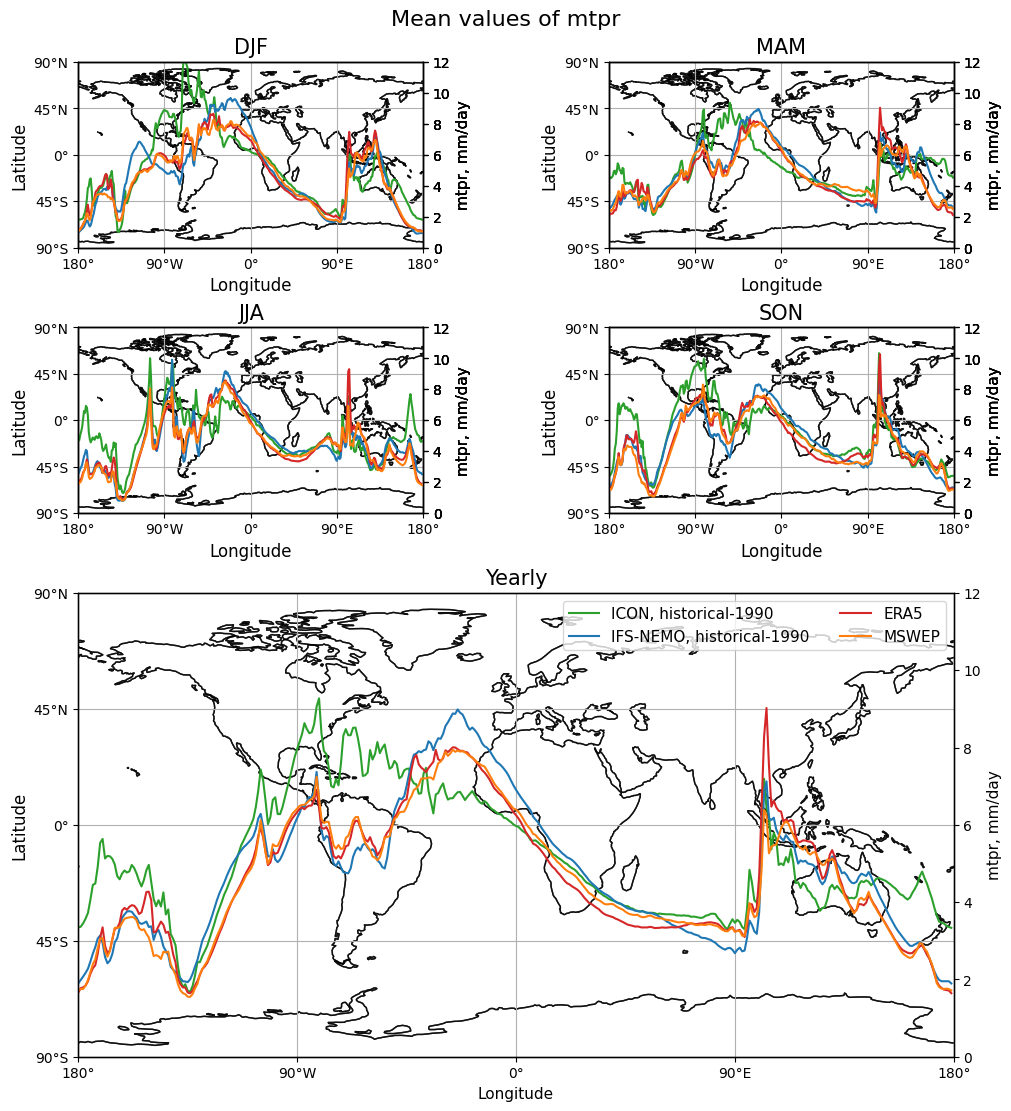

In [22]:
add = diag.plot_of_average(path_to_netcdf=_path_icon+"trop_rainfall_r100_M_lat_1990-01-01T00_2005-01-01T00_M.nc", trop_lat=90,
                           color='tab:green', legend="ICON, historical-1990", pdf_format=pdf_format,
                           path_to_pdf=path_to_pdf, name_of_file='profile_lat')
add = diag.plot_of_average(path_to_netcdf=_path_ifs+"trop_rainfall_r100_M_lat_1990-01-01T00_2002-02-01T00_M.nc", trop_lat=90,
                                   color='tab:blue', fig=add, legend="IFS-NEMO, historical-1990", pdf_format=pdf_format,
                                   path_to_pdf=path_to_pdf, name_of_file='profile_lat')
add = diag.plot_of_average(path_to_netcdf=era5+"trop_rainfall_r100_M_lat_1940-01-01T00_2023-12-01T06_M.nc", trop_lat=90,
                                   color='tab:red', fig=add, legend="ERA5", pdf_format=pdf_format,
                                   path_to_pdf=path_to_pdf, name_of_file='profile_lat')
path_to_mswep = mswep+"trop_rainfall_r100_M_lat_1979-02-01T00_2020-11-01T00_M.nc"
diag.plot_of_average(path_to_netcdf=path_to_mswep, 
                            trop_lat=90, color='tab:orange', fig=add,
                            legend="MSWEP", pdf_format=pdf_format,
                            path_to_pdf=path_to_pdf,
                            name_of_file='profile_lat')
description = (
    f"Comparison of the average precipitation profiles along longitude for different datasets, measured in mm/day. "
    f"The spatial resolution is 10.0 degrees, and the temporal resolution is 1 month. "
    f"The comparison involves the following datasets and their respective time ranges: "
    f"ICON (historical-1990) covers {diag.tools.open_dataset(_path_icon+'trop_rainfall_r100_M_lat_1990-01-01T00_2005-01-01T00_M.nc').time_band}, "
    f"IFS-NEMO (historical-1990) spans {diag.tools.open_dataset(_path_ifs+'trop_rainfall_r100_M_lat_1990-01-01T00_2002-02-01T00_M.nc').time_band}, "
    f"ERA5 covers {diag.tools.open_dataset(era5+'trop_rainfall_r100_M_lat_1940-01-01T00_2023-12-01T06_M.nc').time_band}, and "
    f"MSWEP's time range is {diag.tools.open_dataset(_mswep+'trop_rainfall_r100_M_lat_1979-02-01T00_2020-11-01T00_M.nc').time_band}."
)
_path_to_pdf = add[-1]
if pdf_format:
    add_pdf_metadata(filename=_path_to_pdf, metadata_value=description, loglevel = 'warning')